Function to scrape article text. We will use this a few cells down, I'm just putting it up here for now...

In [ ]:
def scrape_article_text(article_url):
    try:
        article_response = requests.get(article_url)
        if article_response.status_code == 200:
            # Parse the HTML content
            soup = BeautifulSoup(article_response.content, 'html.parser')

            # Try to find the main article text (this can vary between websites)
            # Common tags for article content: <p>, <div>, <article>
            paragraphs = soup.find_all('p')  # maybe change this on a site by site basis...

            # Extract and concatenate the text from the paragraphs
            article_text = ' '.join([para.get_text() for para in paragraphs])

            return article_text if article_text else "No text found"
        else:
            return f" {article_response.status_code}"

    except Exception as e:
        return f"{str(e)}"

# This is the code for scraping stuff from newsdata for Donald Trump, from Brazil

In [ ]:
 import requests
import json

API_KEY = ''

url = 'https://newsdata.io/api/1/news'

params = {
    'apikey': API_KEY,
    'q': 'Donald Trump',
    'country': 'ng',  # country code for Brazil
    'language': 'en',  # Portuguese language for Brazil
}

response = requests.get(url, params=params)


if response.status_code == 200:
    data_trump = response.json()

    #print(data)

    if 'results' in data_trump:
        articles_trump = data_trump['results']
        for i, article in enumerate(articles_trump, 1):
            print(f"Article {i}:")
            print(f"Title: {article.get('title')}")
            print(f"Description: {article.get('description')}")
            print(f"Published At: {article.get('pubDate')}")
            print(f"Source: {article.get('source_id')}")
            print(f"Link: {article.get('link')}")
            print("-" * 50)
    else:
        print("No articles found.")
else:
    print(f"Failed to fetch articles. Status code: {response.status_code}")



Article 1:
Title: Global Stocks Up Amid Imminent Weekly Drop On Us Election Nerves
Description: Global stocks were trading higher on Friday, although they were set for a weekly loss amid U.S. election jitters, while oil prices rose due to concerns about fighting in the Middle East. Republican former President, Donald Trump, and Democratic Vice President, Kamala Harris, are polling neck and neck in crucial swing states ahead of the...The post Global Stocks Up Amid Imminent Weekly Drop On Us Election Nerves appeared first on New Telegraph.
Published At: 2024-10-28 09:45:14
Source: newtelegraphng
Link: https://newtelegraphng.com/global-stocks-up-amid-imminent-weekly-drop-on-us-election-nerves/
--------------------------------------------------
Article 2:
Title: Beyoncé Wants To Be Me – Amber Rose
Description: Reacting, Rose, who had earlier endorsed the Republican Party candidate, Donald Trump, at the party’s National Convention in July, claimed Beyoncé copied her speech.
Published At: 

# This is similar code for Kamala Harris

In [ ]:
params = {
    'apikey': API_KEY,
    'q': 'Kamala Harris',
    'country': 'ng',  # country code for Brazil
    'language': 'en',  # Portuguese language for Brazil
}

response = requests.get(url, params=params)

if response.status_code == 200:
    data_harris = response.json()

    if 'results' in data_harris:
        articles_harris = data_harris['results']
        for i, article in enumerate(articles_harris, 1):
            print(f"Article {i}:")
            print(f"Title: {article.get('title')}")
            print(f"Description: {article.get('description')}")
            print(f"Published At: {article.get('pubDate')}")
            print(f"Source: {article.get('source_id')}")
            print(f"Link: {article.get('link')}")
            print("-" * 50)
    else:
        print("No articles found.")
else:
    print(f"Failed to fetch articles. Status code: {response.status_code}")


Article 1:
Title: Global Stocks Up Amid Imminent Weekly Drop On Us Election Nerves
Description: Global stocks were trading higher on Friday, although they were set for a weekly loss amid U.S. election jitters, while oil prices rose due to concerns about fighting in the Middle East. Republican former President, Donald Trump, and Democratic Vice President, Kamala Harris, are polling neck and neck in crucial swing states ahead of the...The post Global Stocks Up Amid Imminent Weekly Drop On Us Election Nerves appeared first on New Telegraph.
Published At: 2024-10-28 09:45:14
Source: newtelegraphng
Link: https://newtelegraphng.com/global-stocks-up-amid-imminent-weekly-drop-on-us-election-nerves/
--------------------------------------------------
Article 2:
Title: Trump Takes Election Pitch To Storied New York Arena
Description: ShareDonald Trump rallied supporters yesterday at an iconic New York arena while Kamala Harris went to a neighborhood in Philadelphia just over a week before America

This actually gets the article text, the above just gets links

In [ ]:
from bs4 import BeautifulSoup

harris_texts = []
trump_texts = []

for i, article in enumerate(articles_harris, 1):
    article_url = article.get('link')
    article_text = scrape_article_text(article_url)
    harris_texts.append(article_text)
    print(f"Article Text: {article_text}")

for i, article in enumerate(articles_trump, 1):
    article_url = article.get('link')
    article_text = scrape_article_text(article_url)
    trump_texts.append(article_text)
    print(f"Article Text: {article_text}")


Article Text: New Telegraph Global stocks were trading higher on Friday, although they were set for a weekly loss amid U.S. election jitters, while oil prices rose due to concerns about fighting in the Middle East. Republican former President, Donald Trump, and Democratic Vice President, Kamala Harris, are polling neck and neck in crucial swing states ahead of the Nov. 5 U.S. election, and investors are anxious about a contested result roiling world markets and unleashing fresh geopolitical uncertainty. The benchmark S&P 500 was on track to finish the week slightly lower, although gains in technology and communication services stocks were pushing the index higher on the session. The Dow Jones Industrial Average (.DJI), opens new tab fell 0.16 per cent to 42,308.60, the S&P 500 (.SPX) rose 0.49 per cent to 5,838.33 and the Nasdaq Composite (.IXIC) rose 1.15 per cent to 18,627.44. The European shares index (.STOXX) ended slightly lower 0.04 per cent after giving up gains in choppy tradin

Writing articles to files

In [ ]:
with open("harris_texts.txt", "w") as harris_file:
    for article_text in harris_texts:
        harris_file.write(article_text + "\n\n")

with open("trump_texts.txt", "w") as trump_file:
    for article_text in trump_texts:
        trump_file.write(article_text + "\n\n")

installing word cloud library

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

def remove_stopwords(text):
    # Tokenize the text into words
    words = word_tokenize(text)

    # Get the stopwords for the specified language
    stop_words = set(stopwords.words("english"))

    # Remove stopwords from the list of words
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Join the filtered words back into a string
    cleaned_text = ' '.join(filtered_words)

    return cleaned_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


create combined text

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

trump_comb_text = ""
for i in trump_texts:
  trump_comb_text += i

trump_comb_text = remove_stopwords(trump_comb_text)

harris_comb_text = ""
for i in harris_texts:
  harris_comb_text += i

harris_comb_text = remove_stopwords(harris_comb_text)


NameError: name 'trump_texts' is not defined

In [ ]:


# Read the content of each file and store in respective variables
with open("nigeria_harris_texts.txt", "r") as file:
    harris_comb_text = file.read()

with open("nigeria_trump_texts.txt", "r") as file:
    trump_comb_text = file.read()

# Display first 500 characters of each variable as a check
print("Harris Texts Sample:")
print(harris_comb_text[:500])

print("\nTrump Texts Sample:")
print(trump_comb_text[:500])


FileNotFoundError: [Errno 2] No such file or directory: 'nigeria_harris_texts.txt'

In [ ]:
!pip install wordcloud matplotlib

show word clouds and word frequency YAY!

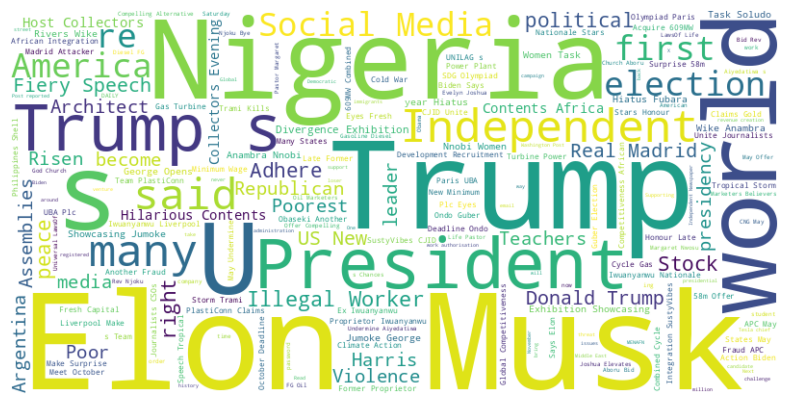

--------------------------------------------------


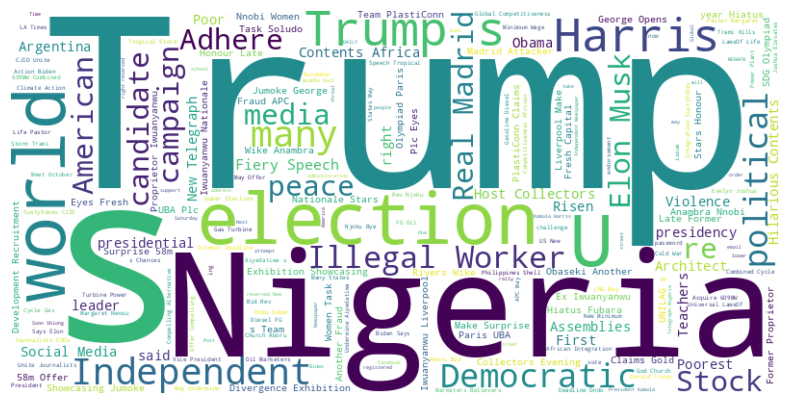

--------------------------------------------------
Word: Elon Musk, Frequency: 1.0
Word: Trump, Frequency: 0.8333333333333334
Word: Nigeria, Frequency: 0.6666666666666666
Word: s, Frequency: 0.625
Word: world, Frequency: 0.5416666666666666
Word: U, Frequency: 0.5416666666666666
Word: President, Frequency: 0.5
Word: Trump s, Frequency: 0.5
Word: Independent, Frequency: 0.4166666666666667
Word: many, Frequency: 0.4166666666666667
Word: said, Frequency: 0.375
Word: election, Frequency: 0.3333333333333333
Word: first, Frequency: 0.3333333333333333
Word: America, Frequency: 0.3333333333333333
Word: re, Frequency: 0.3333333333333333
Word: Social Media, Frequency: 0.3333333333333333
Word: Illegal Worker, Frequency: 0.3333333333333333
Word: right, Frequency: 0.2916666666666667
Word: Stock, Frequency: 0.2916666666666667
Word: Adhere, Frequency: 0.2916666666666667
Word: political, Frequency: 0.2916666666666667
Word: peace, Frequency: 0.2916666666666667
Word: Donald Trump, Frequency: 0.2916666666

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud_trump = WordCloud(width=800, height=400, background_color='white').generate(trump_comb_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))  # Set figure size for better display
plt.imshow(wordcloud_trump, interpolation='bilinear')  # Display the generated image
plt.axis('off')  # Turn off axis lines and labels
plt.show()  # Show the plot

print("-" * 50)

wordcloud_harris = WordCloud(width=800, height=400, background_color='white').generate(harris_comb_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))  # Set figure size for better display
plt.imshow(wordcloud_harris, interpolation='bilinear')  # Display the generated image
plt.axis('off')  # Turn off axis lines and labels
plt.show()  # Show the plot

print("-" * 50)

words_frequencies_trump = wordcloud_trump.words_
for word, freq in words_frequencies_trump.items():
    print(f"Word: {word}, Frequency: {freq}")

print("-" * 50)

words_frequencies_harris = wordcloud_harris.words_
for word, freq in words_frequencies_harris.items():
    print(f"Word: {word}, Frequency: {freq}")
